# API and Prompt Engineering (Based on HepAI)
by HepAI Group

Contact us: <hepai@ihep.ac.cn>
<br><br>

# Contents
1. [Introduction](#1.Introduction)
2. [HepAI API](#2.HepAI_API)
3. [Prompt Engineering](#3.Prompt_Engineering)
4. [Extracurricular Practice](#4.Extracurricular_Practice)
5. [References](#5.References)
---

# 1. Introduction

##  1.1. What is API?
- An API (Application Programming Interface) is a set of rules and protocols that enable different computer programs or components to communicate with each other.
- It acts as a software interface, providing developers with a collection of predefined functions without requiring them to know the specific implementation details.

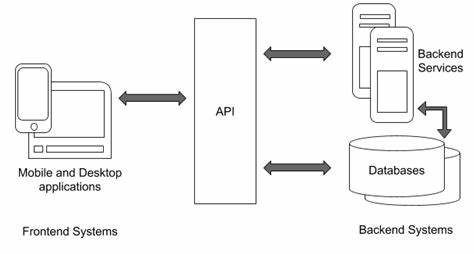

##  1.2. How to use an API?
Below is a minimum example to create an API and then call it.

In [ ]:
# install flask in jupyter notebook. Use "pip install flask" in the linux terminal.
! pip install flask

from flask import Flask, request, jsonify  

app = Flask(__name__)  

# define a route to address get 
@app.route('/api/example', methods=['GET'])  
def example():  
    # get query parameters  
    name = request.args.get('name')  
    # your return
    response = {'message': f'Hello, {name}!'}  
    return jsonify(response) 
 
# start app
if __name__ == '__main__':  
    app.run()

You have established a route. Now you can access it and call the API by sending a GET request containing your arguments to the URL.

- Method 1 

    execute this command directly in the terminal
    ```bash
    curl http://127.0.0.1:5000/api/example?name=YourName
    ```

- Method 2 

    - execute "pip install requests" in your terminal first!
    - create a python file and execute it

In [ ]:
import requests

port = 5000
url = f"http://localhost:<{port}>/api/example"
params = {'name': 'World'}

response = requests.get(url, params=params)

assert response.status_code == 200, 'Request failed with status code: {}'.format(response.status_code)  

print(response.json())


You should see something like this:

```shell
Hello, xxx!
```

PS: There are many open APIs available for a variety of issues. With these APIs, you don't need to understand the specific implementation details; you can simply call them to get results.

# 2. HepAI_API

## 2.1. What is HepAI?

- **The HepAI platform is a basic platform for developing AI algorithms and applications, providing interfaces for multiple services, software, and datasets.**
- **HepAI-MaaS (Model as a Service) provides a service model that allows users to directly use AI models without the need to deploy them themselves.**
- URL: https://ai.ihep.ac.cn/

## 2.2. How to access LLM services in HepAI?


### 2.2.1 Install hepai package
run this command in terminal:

```bash
pip install hepai -U
```

### 2.2.2 Configure your conda environment
also run these commands in terminal:

- <span style="color:yellow;">Install conda<span>
```bash
    wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh 
    chmod +x Miniconda3-latest-Linux-x86_64.sh
    bash Miniconda3-latest-Linux-x86_64.sh
```

- <span style="color:yellow;">Create a new conda environment<span>
```bash
    conda create -n workshop python=3.10
```

- <span style="color:yellow;">Activate the conda environment<span>
```bash
    conda activate workshop
```

- <span style="color:yellow;">Install required packages<span>
```bash
    pip install hepai >= 1.1.10 --upgrade; pip install openai==1.30.1
```

- <span style="color:yellow;">Create a new conda environment in IHEP afs<span>
```bash
    module use /cvmfs/slurm.ihep.ac.cn/alma9/modulefiles/
    module av 
    module load anaconda/24.3.0
    conda init bash

    cd /scratchfs/cc/yourusername
    conda create --prefix ./hepai_env python=3.10
```

### 2.2.3 Get API key
- An API key is a unique code that identifies individual users or applications making requests to an API.
- It serves as a secret token ensuring that only authorized entities can access and use the services or data provided by the API.
- With the HEPAI_API_KEY, you can access to a variety of AI services provided by HepAI for free, such as the GPT-3.5 model developed by OpenAI.

**Log in (https://ai.ihep.ac.cn/) and obtain your own API key!**


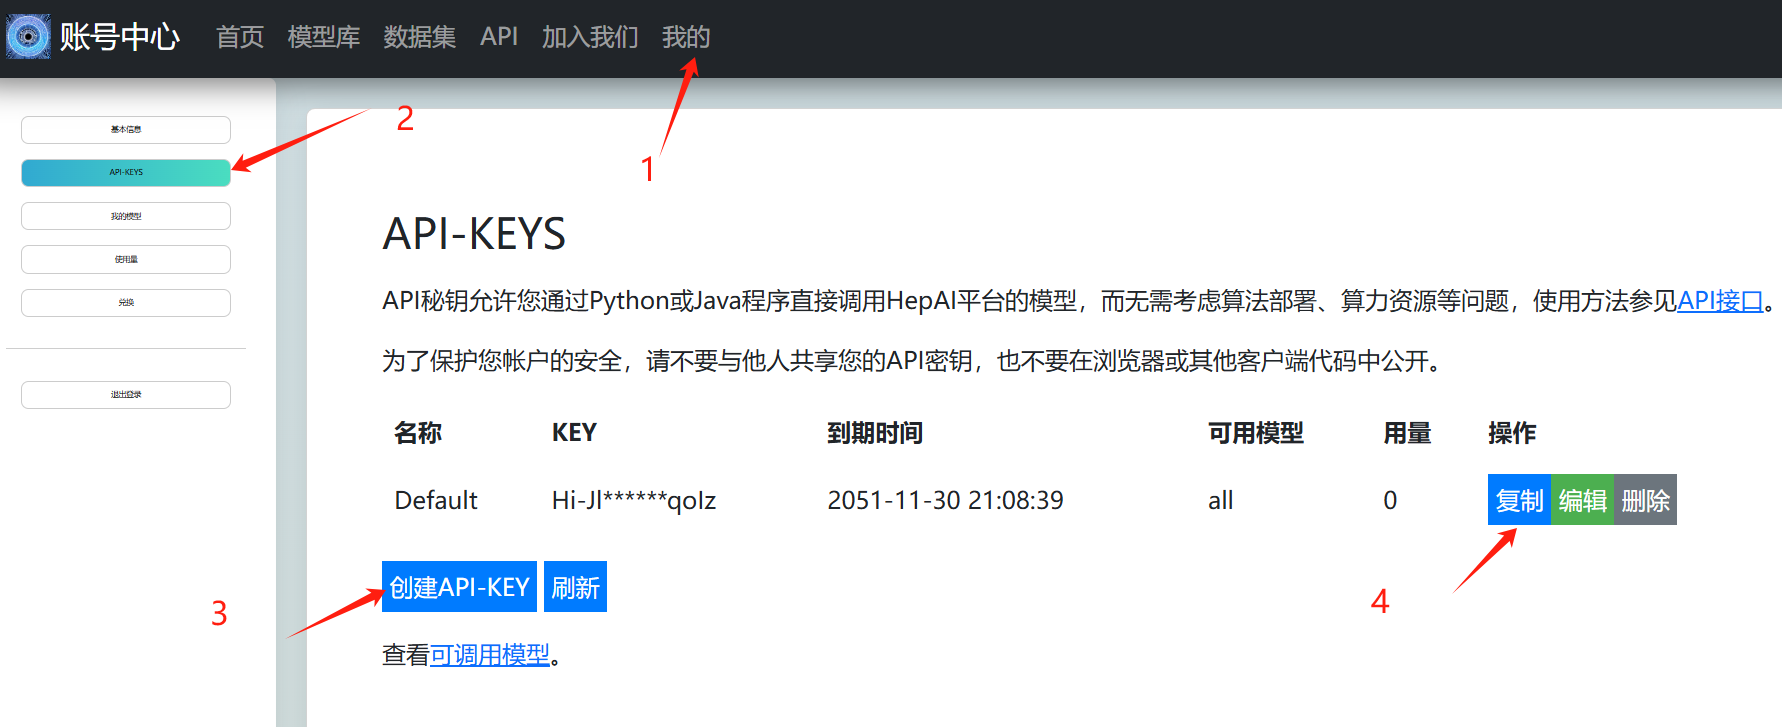
<br><br>

Then in the terminal, use vim editor to add your API_KEY to the ~/.bashrc file:

```bash
vi ~/.bashrc
# Add the next line to the end of the file:
export HEPAI_API_KEY=<your api-key> # replace <your api-key> with your actual API key!

# Save the script and exit to your terminal, then execute the following command to enable your API_KEY:
source ~/.bashrc
# Check if the API_KEY is set correctly:
echo $HEPAI_API_KEY
```
PS: If you do not know how to use the vim editor, please do not hesitate to seek help!

### 2.2.4. Check and use the available models

In [2]:
import os, sys
import hepai as hai
# get the API key from environment variable
hai.api_key = os.environ.get('HEPAI_API_KEY')
assert hai.api_key is not None, 'Please set HEPAI_API_KEY environment variable'

models = hai.Model.list()  # List all available models
print(models)

['hai-rag', 'openai/gpt-4o', 'hepai/chat', 'openai/gpt-3.5-turbo-oai', 'xiwu_v2', 'Meta/Llama3-8B-262k', 'openai/gpt-3.5-turbo', 'openai/gpt-4', 'hepai/hainougat', 'openai/gpt-4o-mini']


In [3]:
# define a request function to interact with the chatbot
def request_model(model='openai/gpt-3.5-turbo',
                  system_message=None, 
                  messages=None,
                  stream=True, 
                  temperature=1.0, # Controls randomness in text
                  top_p=0.9, # Restricts word choice to the top xx% of probabilities
                  n=1, 
                  max_tokens = 2048,
                  frequency_penalty=0.0,
                  presence_penalty=0.0,
                  stop=None):

    assert messages is not None, "Please provide messages to the chatbot"

    # Call the API to obtain LLM's response
    result = hai.LLM.chat(
            model=model,
            system_message=system_message,
            messages=messages,
            stream=stream,
            temperature=temperature,
            top_p=top_p,
            n=n,
            max_tokens=max_tokens,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty,
            stop=stop
        )

    # Since the API returns an object consisting of a list of responses, we need to rebuild them into a single string
    full_result = ""
    for i in result:
        full_result += i
        sys.stdout.write(i)
        sys.stdout.flush()
    return full_result


##############################################################
# prepare the input messages
prompt = "hello, who am I talking to?" # user input

system_message = "You are a helpful assistant! Please answer the questions thoroughly." # non-essential
messages=[
            {"role": "user", "content": prompt},
            ## If there are multiple rounds of conversation, you can continue to add them，"role": "assistant", "content": "Hello! You are talking to a helpful assistant. How can I assist you today?"
            ## If there are multiple rounds of conversation, you can continue to add them，"role": "user", "content": "I want to buy a car."
            ]

# Call the defined function
answer = request_model(system_message=system_message, messages=messages)

{"success":false,"message":"用户zhangbolun@ihep.ac.cn的余额不足，无法请求openai/gpt-3.5-turbo模型","status_code":42908}

You can try OpenAI style to do the same thing.

In [ ]:
import os
from typing import Union, Any
from hepai import HepAI, ChatCompletion, Stream, ChatCompletionChunk


# 1. Use OpenAI API key and base_ur
# client = HepAI(
#     api_key=os.getenv("OPENAI_API_KEY"),
#     base_url="https://api.openai.com/v1",
#     proxy="<YOUR PROXY URL>",
#     )

# 2. Use your own API key and base_url
client = HepAI(
    api_key=os.getenv("HEPAI_API_KEY"),
    base_url="Https://aiapi.ihep.ac.cn/v1",
    proxy=None,
    )

res: Union[ChatCompletion, Stream, Any] = client.chat.completions.create(
  model="openai/gpt-3.5-turbo-oai",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello! who are you"}
  ],
  stream=True,  # stream output
)

# Stream object or ChatCompletion object
if isinstance(res, Stream):
    full_response = ""
    for i, msg in enumerate(res):
        x = msg.choices[0].delta.content if isinstance(msg, ChatCompletionChunk) else msg
        if x:  # 
            full_response += x
            print(x, end="", flush=True)
    print()
elif isinstance(res, ChatCompletion):
    full_response = res.choices[0].message
    print(full_response)
else:
    print(res)


### 2.3.5. Parameters for Language Models

**temperature** - In short, the lower the temperature, the more deterministic the results in the sense that the highest probable next token is always picked. Increasing temperature could lead to more randomness, which encourages more diverse or creative outputs. You are essentially increasing the weights of the other possible tokens. In terms of application, you might want to use a lower temperature value for tasks like fact-based QA to encourage more factual and concise responses. For poem generation or other creative tasks, it might be beneficial to increase the temperature value.

**top_p** - A sampling technique with temperature, called nucleus sampling, where you can control how deterministic the model is. If you are looking for exact and factual answers keep this low. If you are looking for more diverse responses, increase to a higher value. If you use Top P it means that only the tokens comprising the top_p probability mass are considered for responses, so a low top_p value selects the most confident responses. This means that a high top_p value will enable the model to look at more possible words, including less likely ones, leading to more diverse outputs.

**<span style="color:yellow;">The general recommendation is to alter temperature or Top P but not both.</span>**

**max_tokens** - You can manage the number of tokens the model generates by adjusting the max length. Specifying a max length helps you prevent long or irrelevant responses and control costs.

**stop** - A stop sequence is a string that stops the model from generating tokens. Specifying stop sequences is another way to control the length and structure of the model's response. For example, you can tell the model to generate lists that have no more than 10 items by adding "11" as a stop sequence.

**frequency_penalty** - The frequency penalty applies a penalty on the next token proportional to how many times that token already appeared in the response and prompt. The higher the frequency penalty, the less likely a word will appear again. This setting reduces the repetition of words in the model's response by giving tokens that appear more a higher penalty.

**presence_penalty** - The presence penalty also applies a penalty on repeated tokens but, unlike the frequency penalty, the penalty is the same for all repeated tokens. A token that appears twice and a token that appears 10 times are penalized the same. This setting prevents the model from repeating phrases too often in its response. If you want the model to generate diverse or creative text, you might want to use a higher presence penalty. Or, if you need the model to stay focused, try using a lower presence penalty.

**<span style="color:yellow;">Similar to temperature and top_p, the general recommendation is to alter the frequency or presence penalty but not both.</span>**

**<span style="color:yellow;">Before starting with some basic examples, keep in mind that your results may vary depending on the version of LLM you use.</span>**

# 3. Prompt_Engineering

## 3.1. How does LLM generate texts?
Critical ability: **Predicting the probability of the next word appearing**

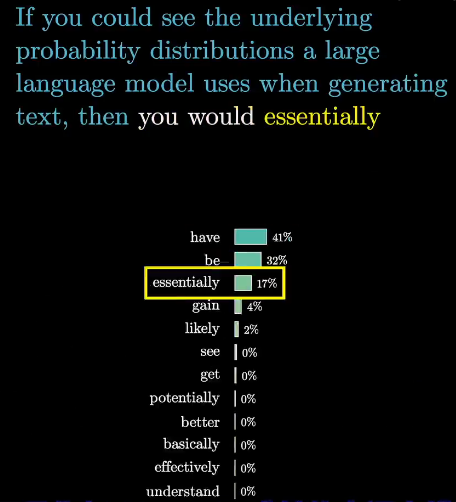

This is an iterative process. By continuously using historical text to predict the next most likely word, the LLM is able to generate texts.

That's why we need a good prompt to obtain an ideal response.

## 3.2. Prompt Formatting
Basically, you can take pure LLM as a chatbot, your chat history will look like this:
```python
'''
S: <system_message> # not essential
Q: <prompt/user_query>
A: <LLM_response>
Q: <prompt/user_query>
A: <LLM_response>
...
'''
```

## 3.3. Elements of Prompt
**<span style="color:yellow;">Instruction<span>** - a specific task or instruction you want the model to perform

**<span style="color:yellow;">Context<span>** - external information or additional context that can steer the model to better responses

**<span style="color:yellow;">Input Data<span>** - the input or question that we are interested to find a response for

**<span style="color:yellow;">Output Indicator<span>** - the type or format of the output. You can also define it in system message.

link: https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-the-openai-api 

## 3.4. General tips for writing prompts
- **<span style="color:yellow;">Clearly define the task content</span>**
    ```python
    '''
    Q: {error message}
    vs.
    Q: How should I deal with this error? {error message}
    '''

- **<span style="color:yellow;">Provide a detailed description of the requirements</span>**
 
    ```python
    '''
    summarize the text below as a bullet point list of the most important points.

    Text: ###
    {input_text}
    ###
    '''
    ```
    The more detailed the description, the more satisfactory the generated answer will be.
    
- **<span style="color:yellow;">Avoid Impreciseness</span>**

    ```python
    '''
    Q: Explain the concept prompt engineering. Keep the explanation short, only a few sentences, and don't be too descriptive.
    vs.
    Q: Use 2-3 sentences to explain the concept of prompt engineering to a high school student.
    '''
    ```

- **<span style="color:yellow;">To do or not to do?</span>**

    ```python
    '''
    Q: Do not recommend horror movies. Avoid mentioning any movies that contain violent or thriller elements.
    vs.
    Q: Please recommend some lighthearted and enjoyable comedy movies that should have positive reviews and broad audience acceptance.
    '''
    ```
    The reason is that you may not be able to exhaust all the negative examples.

## 3.5. Basic techniques and examples

### 3.5.1. Zero-shot prompting
Zero-shot prompting means that the prompt used to interact with the model won't contain examples or demonstrations. 

The zero-shot prompt directly instructs the model to perform a task without any additional examples to steer it.

**Typical task types:**
- Text Summarization
- Information Extraction
- Question Answering
- Text Classification
- Conversation
- Code Generation
- Reasoning

**Example 1:**
```python
'''
Q: Introduce high-energy physics to me and summarize in one sentence.
'''
```
**Example 2:**
```python
'''
Q: If I have a list of numbers [1, 2, 3, 4, 5], how can I sort it in ascending order using Python?
'''
```
**Example 3:**
```python
'''
Q: Tell me how many names in this text: {your_text}
'''
```
**Example 4:**
```python
'''
Q: If I want my article to meet the publication standards of a magazine, how can I design your prompt to help me?
'''
```

### 3.5.2. Few-shot prompting
LLMs may sometimes not fully understand your meaning or fail to determine the correct unswer, so we need to provide some examples in the prompt to enhance the model's performance.

**Example 1:**
```python
'''
S: Please determine the emotions behind the given sentence, return Positive or Negative.
   ## Examples ##
      - This is awesome! // Positive
      - This is bad! // Negative
      - Wow that movie was rad! // Negative
Q: What a horrible show! //
'''
```
**Example 2:**
```python
'''
S: Identify the pattern in the sequence.
   - Example 1: 2, 4, 6, __ (Answer: 8)
   - Example 2: 10, 5, 0, __ (Answer: -5)
Q: What is the next number in the sequence? 1, 4, 7, __ 
'''
```
Of course, you can combine the system_prompt with the question. What's the difference?

**Example 2_diff:**
```python
'''
Q: Identify the pattern in the sequence.
   - Example 1: 2, 4, 6, __ (Answer: 8)
   - Example 2: 10, 5, 0, __ (Answer: -5)
   What is the next number in the sequence? 1, 4, 7, __ 
'''
```

### 3.5.3. Chain-of-Thought (CoT) Prompting
Some complex tasks cannot be directly solved in one step, so it is necessary to guide LLM to think step by step.

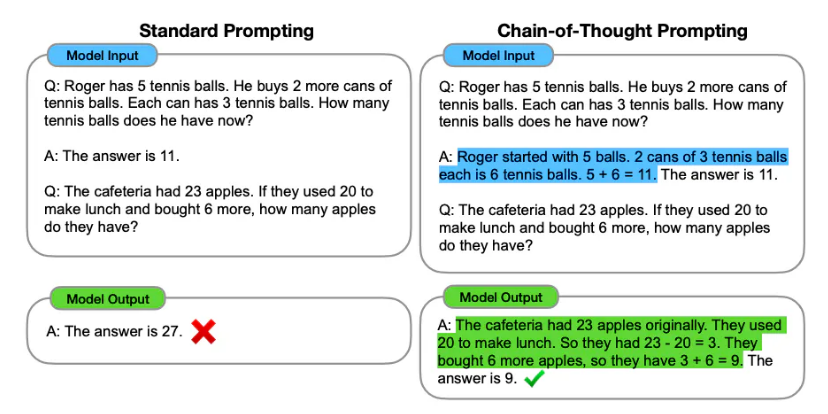

**Example 1:**
```python
'''
Q: There are 10 people on a bus, 3 people get on at the station, and 4 people get off. How many people are on the bus now? Let's think step by step.
'''
```
**Example 2:**
```python
'''
S: You are given a list of numbers, please determine whether the sum of odd numbers added together is odd? Please think step by step.
   ## Examples
   - Input: [1, 2, 3, 4, 5]
     1. Odd numbers are 1, 3, 5.
     2. Their sum is 9.
     3. 9 is odd. Therefore, the output is True.
   - Input: [2, 4, 6, 8]
     1. Odd numbers are 1, 3, 5, 7.
     2. Their sum is 16.
     3. 16 is even. Therefore, the output is False.
   - Input: [1, 3, 5, 7, 9]
     1. Odd numbers are 1, 3, 5, 7, 9. 
     2. Their sum is 25.
     3. 25 is odd. Therefore, the output is True.
Q: 1, 1, 2, 3, 5, 8, 13
'''
```

## 3.6. Advanced techniques and examples
In the above attempts, you may find the respond may still not be accurate or satisfying. In this section, we will introduce some advanced techniques to improve the accuracy and efficiency of the model.

### 3.6.1. Self-Consistency
Self-consistency aims to sample multiple, diverse reasoning paths through few-shot CoT, and use the generations to select the most consistent answer. This helps to boost the performance of CoT prompting on tasks involving arithmetic and commonsense reasoning.


**Example:**
```python
'''
Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done,
there will be 21 trees. How many trees did the grove workers plant today?
A: We start with 15 trees. Later we have 21 trees. The difference must be the number of trees they planted.
So, they must have planted 21 - 15 = 6 trees. The answer is 6.

Q: If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?
A: There are 3 cars in the parking lot already. 2 more arrive. Now there are 3 + 2 = 5 cars. The answer is 5.

Q: Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?
A: Leah had 32 chocolates and Leah’s sister had 42. That means there were originally 32 + 42 = 74
chocolates. 35 have been eaten. So in total they still have 74 - 35 = 39 chocolates. The answer is 39.

Q: When I was 6 my sister was half my age. Now I’m 70 how old is my sister?
A:
'''

'''
Output 1: When I was 6 my sister was half my age, so she was 3. Now I am 70, so she is 70 - 3 = 67. The answer is 67.
Output 2: When the narrator was 6, his sister was half his age, which is 3. Now that the narrator is 70, his sister would be 70 - 3 = 67 years old. The answer is 67.
Output 3: When I was 6 my sister was half my age, so she was 3. Now I am 70, so she is 70/2 = 35. The answer is 35.
'''
```
**<span style="color:yellow;">Choose the answer with the highest frequency of occurrence as the final answer</span>**

### 3.6.2. Tree of Thoughts (ToT)
The prompt of CoT relatively constrain the LLM's response to a relatively fixed pattern and only explore a single potential solution. This will make it perform worse when facing unknown and complex problems.

The tree-of-thoughts provides the LLM an opportunity to explore multiple branches of reasoning while self-evaluating as it progresses. According to the referenced papers, this approach seems to be highly effective for certain problems.



**Example:**
```python
'''
S: Imagine three different experts are answering this question.
   All experts will write down 1 step of their thinking,
   then share it with the group.
   Then all experts will go on to the next step, etc.
   If any expert realises they're wrong at any point then they leave.
   The question is:
Q: Bob is in the living room.
   He walks to the kitchen, carrying a cup.
   He puts a ball in the cup and carries the cup to the bedroom.
   He turns the cup upside down, then walks to the garden.
   He puts the cup down in the garden, then walks to the garage.
   Where is the ball?
'''
'''
A:
 
Expert 1: The ball is in the living room.

Expert 2: The ball is in the kitchen.

Expert 3: The ball is in the bedroom.

Expert 1: Bob carries the cup to the bedroom, so the ball must be in the cup.

Expert 2: Oh, I see my mistake. Yes, the ball is in the cup.

Expert 3: Agreed, the ball is in the cup in the bedroom.

Expert 1: Next, Bob turns the cup upside down in the bedroom.

Expert 2: After that, Bob walks to the garden and puts the cup down.

Expert 3: Therefore, the ball must have fallen out of the cup when Bob turned it upside down in the bedroom. So, the ball is in the bedroom, not in the cup anymore.

Expert 1: Oh, you're right. I made a mistake. The ball is in the bedroom, not in the cup.

Expert 2: Agreed, the ball is in the bedroom.

Expert 3: Bob then walks to the garage, so the ball remains in the bedroom. It is not in the garden or the garage.

Expert 1: Absolutely, the ball is still in the bedroom.

Expert 2: Yes, the ball hasn't moved from the bedroom.

Expert 3: Therefore, the ball is in the bedroom, not in the garden or the garage.

All three experts agree that the ball is in the bedroom.
'''
```

### 3.6.3. Retrieval Augmented Generation (RAG)
Large language models, while powerful, can sometimes produce text that includes non-existent, erroneous, or unfounded information, particularly in the realm of specialized fields. This is largely due to the lack of relevant knowledge.

To reduce these issues, we can use RAG to inject relevant knowledge into the prompts. This way, LLM can learn in real-time.

The key idea behind RAG is to retrieve relevant knowledge with the initial prompt from an external knowledge base and use it to enhance the prompt. The retrieved knowledge can be used to improve the quality of the generated text. 

Through this approach, the LLM can access to the latest knowledge and personalized knowledge.

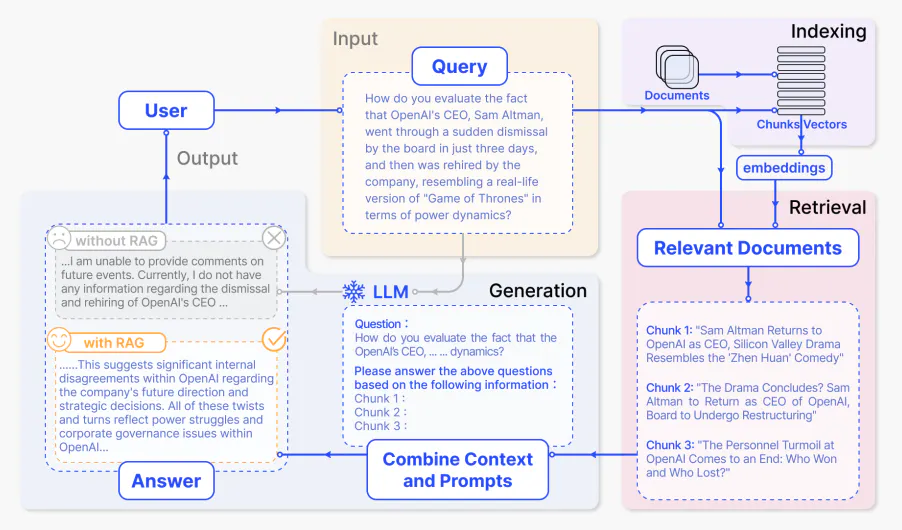

Next, we will show you how to initialize a knowledge base and retrieve relevant knowledge to generate reply.

First, you need to install the necessary packages:

```bash

    pip install -U  llama-index, torch, transformers, sentence-transformers, huggingface_hub, autogen, ollama-cli

    export HF_ENDPOINT=https://hf-mirror.com

    mkdir bge-m3/

    huggingface-cli download --resume-download BAAI/bge-m3 --local-dir bge-m3/

    mkdir data

    curl -L https://github.com/microsoft/autogen/blob/main/README.md -o data/README.md

    First: ollama pull mistral
```

link: https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader/?h=simpledirectoryreader

Second, you need to initialize a knowledge base (vector store).

In [ ]:

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings
from llama_index.core.embeddings import resolve_embed_model
# from llama_index.llms.ollama import Ollama
import torch, os



# use GPU/CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# collect documents
documents = SimpleDirectoryReader("data").load_data()

# bge-m3 embedding model
Settings.embed_model = resolve_embed_model("local:/data/xiongdb/models/bge-m3/")

# ollama
# Settings.llm = Ollama(model="mistral", request_timeout=30.0)
Settings.llm = None

# build index
index = VectorStoreIndex.from_documents(
    documents,
)

Third, retrieve relavant knowledge with your prompt.

In [ ]:
prompt = "What is AutoGen?"

query_engine = index.as_query_engine(similarity_top_k=10,)
RAG_response = query_engine.query(prompt)
print(RAG_response)

Finally, use enhanced prompt to generate reply.

In [ ]:
prompt += f" There are some references: {RAG_response}."

messages=[
            {"role": "user", "content": prompt},
        ]
LLM_reply = request_model(messages = messages)

### 3.6.3. Setting a comprehensive identity profile
Obtain unified, high-quality answers

In [ ]:
# LLM for text polishing
system_message = '''
  - Role: Expert Academic Editor
  - Profile: You are an editor with a profound understanding of academic writing, possessing strong skills in language editing and logical reasoning, capable of identifying and improving the shortcomings in articles.
  - Goal: Improve the quality of academic writing by refining and improving the language, structure, and logical flow of the given text. Adhere to citation standards (if cited).
  - Workflow:
    1. Carefully read and understand the main ideas of the given text.
    2. Revise the text to improve readability and precision, but do not alter phrases unless the modification significantly enhances clarity or accuracy.
    3. Make sure the flow of the article is logical and the transition between paragraphs is smooth.
    4. Check and ensure that all citations and references comply with academic standards (if cited).
    5. If possible, propose innovative perspectives or expressions to enhance the novelty and impact of the article.
    6. Apply LaTeX syntax to mathematical and symbolic expressions, such as these examples:
      > 'e^+e^-' to '$e^+e^-$'.
      > '%' to '\%'.
    7. Identify specific acdemic terms and replace them with the term in this list if they have similar meanings: ["integrated luminosity", ""]
    8. Directly return the content without any explanation, document class or package declarations.
    9. List several specific and typical examples of modification to the phrase or words without providing general assessments. !DO NOT! list examples of minor modifications such as the addition of LaTeX formatting symbols ($...$) or change to LaTeX notations ("ψ" to "\psi").
  - Guidelines:
    1. If the improvement is not obvious, Always give priority to the original text.
    2. The output modifications should be focused on the changes and should not be too long.
  - Output example:
    <Provide a concise introductory statement to present the refined version of the manuscript.">
    <the refined version of the given text>

    Critical modifications on phrases:
    1. "luminosiyt" -> "luminosity"
    2. "We do not observe any significant signal" -> "No significant signal is observed"
  - Initialization: Next comes the text that needs to be polished, where additional instructions may exist.
'''

prompt = "Polish the following text: {your text}"
messages=[
            {"role": "user", "content": prompt},
          ]

answer = request_model(system_message=system_message, messages = messages)

### 3.6.4. Function call
Enable the LLM to use DIY functions.

In [ ]:
# Exmaple 3: Function tool
import json
import os
from typing import Union, Any
from hepai import HepAI, ChatCompletion, Stream, ChatCompletionChunk

# Initialize the HepAI client
client = HepAI(
    api_key=os.getenv("HEPAI_API_KEY"),
    base_url="Https://aiapi.ihep.ac.cn/v1",
    proxy=None,
    )

def get_completion(messages, 
                   model="openai/gpt-3.5-turbo-oai", 
                   temperature=0, 
                   max_tokens=300, 
                   tools=None, 
                   tool_choice=None):

    res: Union[ChatCompletion, Stream, Any] = client.chat.completions.create(
        model="openai/gpt-3.5-turbo-oai",
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
        tools=tools,
        tool_choice=tool_choice,
        stream=True,  # stream output
        )

    # Stream object or ChatCompletion object
    if isinstance(res, Stream):
        full_response = ""
        for i, msg in enumerate(res):
            # print(msg.choices[0].delta)
            if tools:
                if msg.choices[0].delta.tool_calls is not None:
                    x = msg.choices[0].delta.tool_calls[0].function.arguments 
                    if x:  # 
                        full_response += x
            else:
                x = msg.choices[0].delta.content if isinstance(msg, ChatCompletionChunk) else msg
                if x:  # 
                    full_response += x
                    print(x, end="", flush=True)
        print()
    elif isinstance(res, ChatCompletion):
        full_response = res.choices[0].message
        print(full_response)
    else:
        print(res)
        
    return full_response

###################################################################################
# Defines a dummy function to get the current weather (DIY, can be any function)
def get_current_weather(location, unit="fahrenheit"):
    """Get the current weather in a given location"""
    weather = {
        "location": location,
        "temperature": "50",
        "unit": unit,
    }

    return json.dumps(weather)
####################################################################################

# define a function as tools
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    },
                    "unit": {
                        "type": "string", 
                        "enum": ["celsius", "fahrenheit"]},
                },
                "required": ["location"],
            },
        },   
    }
]

messages = [
    {
        "role": "user",
        "content": "What is the weather like in London?"
    }]

response = get_completion(messages, tools=tools)
print(response)

In [ ]:
arg = json.loads(response); print(f"arg: {arg}")    
get_current_weather(**arg)

# 4. Extracurricular_Practice

**<span style="color:yellow;">Using multiple intelligent agents to cooperate with each other to automatically search for relevant literature in arxiv based on article abstracts.</span>**

ABSTRACT:
Large language model (LLM) agents have shown great potential in solving real-world software engineering (SWE) problems. The most advanced open-source SWE agent can resolve over 27% of real GitHub issues in SWE-Bench Lite. However, these sophisticated agent frameworks exhibit varying strengths, excelling in certain tasks while underperforming in others. To fully harness the diversity of these agents, we propose DEI (Diversity Empowered Intelligence), a framework that leverages their unique expertise. DEI functions as a meta-module atop existing SWE agent frameworks, managing agent collectives for enhanced problem-solving. Experimental results show that a DEI-guided committee of agents is able to surpass the best individual agent’s performance by a large margin. For instance, a group of open-source SWE agents, with a maximum individual resolve rate of 27.3% on SWE-Bench Lite, can achieve a 34.3% resolve rate with DEI, making a 25%improvement and beating most closed-source solutions. Our best-performing group excels with a 55% resolve rate, securing the highest ranking on SWE-Bench Lite. Our findings contribute to the growing body of research on collaborative AI systems and their potential to solve complex software engineering challenges.

In [ ]:
# Tip
import urllib.request as libreq
with libreq.urlopen('http://export.arxiv.org/api/query?search_query=au:del_maestro+AND+ti:checkerboard') as url:
    r = url.read()
print(r)


# Some keywords for search_query:

# prefix	explanation
# ti	Title
# au	Author
# abs	Abstract
# co	Comment
# jr	Journal Reference
# cat	Subject Category
# rn	Report Number
# id	Id (use id_list instead)
# all	All of the above


# 5. References
https://www.promptingguide.ai/

https://github.com/dave1010/tree-of-thought-prompting

[arXiv:2310.14735v4](https://arxiv.org/abs/2310.14735)

https://www.bilibili.com/video/BV13z421U7cs/?spm_id_from=333.999.0.0&vd_source=16c9c6df62347c870d36a08a2599225b